In [65]:
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import pandas as pd

import geopandas as gpd

from shapely.geometry import LineString, MultiPolygon, Point, Polygon


pd.set_option('display.max_colwidth', None) # Show full column content


print(f"""OSMnx version: {ox.__version__}""")

f"""NetworkX version: {nx.__version__}"""

OSMnx version: 1.2.3


'NetworkX version: 3.2.1'

In [2]:
G = ox.load_graphml('walk_network_4_nodes_6_edges.graphml')

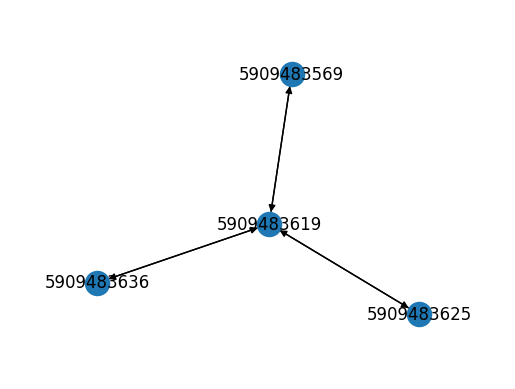

In [3]:
nx.draw_networkx(G)


# Set margins for the axes so nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [4]:
from gpbp.distance import _get_poly_nx


(actual_nodes_gdf, actual_edges_gdf) = _get_poly_nx(
        G, road_node=5909483619, dist_value=50, distance_type="length"
    )

actual_nodes_gdf

,geometry
id,
5909483625,POINT (-122.23124 37.76876)
5909483619,POINT (-122.23141 37.76871)
5909483636,POINT (-122.23178 37.76896)


In [7]:
actual_edges_gdf

0                                                                   LINESTRING (-122.23124 37.76876, -122.23141 37.76871)
1                                                                   LINESTRING (-122.23141 37.76871, -122.23124 37.76876)
2    LINESTRING (-122.23141 37.76871, -122.23148 37.76877, -122.23156 37.76882, -122.23167 37.76890, -122.23178 37.76896)
3    LINESTRING (-122.23178 37.76896, -122.23167 37.76890, -122.23156 37.76882, -122.23148 37.76877, -122.23141 37.76871)
dtype: geometry

In [24]:

# print more decimals for x and y

pd.options.display.float_format = '{:.5f}'.format

actual_nodes_gdf.get_coordinates()



,x,y
id,,
5909483625,-122.23124,37.76876
5909483619,-122.23141,37.76871
5909483636,-122.23178,37.76896


In [30]:
G.nodes

NodeView((5909483625, 5909483619, 5909483636, 5909483569))

In [31]:
G.nodes[5909483569]

{'y': 37.768278, 'x': -122.2315948, 'street_count': 3}

In [32]:
actual_edges_gdf

0                                                                   LINESTRING (-122.23124 37.76876, -122.23141 37.76871)
1                                                                   LINESTRING (-122.23141 37.76871, -122.23124 37.76876)
2    LINESTRING (-122.23141 37.76871, -122.23148 37.76877, -122.23156 37.76882, -122.23167 37.76890, -122.23178 37.76896)
3    LINESTRING (-122.23178 37.76896, -122.23167 37.76890, -122.23156 37.76882, -122.23148 37.76877, -122.23141 37.76871)
dtype: geometry

### Debug function

In [ ]:
# I think subgraph should equal G minus the node ending in 69



In [35]:
subgraph = nx.ego_graph(
    G, 
    5909483619, 
    radius=50, 
    distance="length"
)

OutMultiEdgeView([(5909483625, 5909483619, 0), (5909483619, 5909483625, 0), (5909483619, 5909483636, 0), (5909483636, 5909483619, 0)])

In [36]:
subgraph.edges()

OutMultiEdgeDataView([(5909483625, 5909483619), (5909483619, 5909483625), (5909483619, 5909483636), (5909483636, 5909483619)])

In [38]:
# show edges as dataframe

edges_df = pd.DataFrame(subgraph.edges(data=True))

edges_df

,0,1,2
0,5909483625,5909483619,"{'osmid': 625922074, 'highway': 'footway', 'oneway': False, 'reversed': False, 'length': 15.532}"
1,5909483619,5909483625,"{'osmid': 625922074, 'highway': 'footway', 'oneway': False, 'reversed': True, 'length': 15.532}"
2,5909483619,5909483636,"{'osmid': 625922095, 'highway': 'footway', 'oneway': False, 'reversed': False, 'length': 43.575, 'geometry': LINESTRING (-122.2314069 37.7687054, -122.2314797 37.7687656, -122.2315618 37.7688239, -122.2316698 37.7688952, -122.2317839 37.7689584)}"
3,5909483636,5909483619,"{'osmid': 625922095, 'highway': 'footway', 'oneway': False, 'reversed': True, 'length': 43.574999999999996, 'geometry': LINESTRING (-122.2317839 37.7689584, -122.2316698 37.7688952, -122.2315618 37.7688239, -122.2314797 37.7687656, -122.2314069 37.7687054)}"


In [40]:
for n_fr, n_to in subgraph.edges():
    print(n_fr, n_to)

5909483625 5909483619
5909483619 5909483625
5909483619 5909483636
5909483636 5909483619


In [43]:
G.get_edge_data(5909483619, 5909483636)[0]

{'osmid': 625922095,
 'highway': 'footway',
 'oneway': False,
 'reversed': False,
 'length': 43.575,
 'geometry': <shapely.geometry.linestring.LineString at 0x106f1ff70>}

In [ ]:
edge_lines = []

for n_fr, n_to in subgraph.edges():
        print(n_fr, n_to)
        f = nodes_gdf.loc[n_fr].geometry
        t = nodes_gdf.loc[n_to].geometry
        edge_lookup = G.get_edge_data(n_fr, n_to)[0].get("geometry", LineString([f, t]))
        edge_lines.append(edge_lookup)

# edges_gdf = gpd.GeoSeries(edge_lines)

Row 2 of subgraph.edges()

In [50]:
n_fr = 5909483619
n_to = 5909483636

f = actual_nodes_gdf.loc[n_fr].geometry
t = actual_nodes_gdf.loc[n_to].geometry


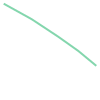

In [51]:
G.get_edge_data(n_fr, n_to)[0].get("geometry", LineString([f, t]))

Let's write the expected data

In [52]:
edges_df

,0,1,2
0,5909483625,5909483619,"{'osmid': 625922074, 'highway': 'footway', 'oneway': False, 'reversed': False, 'length': 15.532}"
1,5909483619,5909483625,"{'osmid': 625922074, 'highway': 'footway', 'oneway': False, 'reversed': True, 'length': 15.532}"
2,5909483619,5909483636,"{'osmid': 625922095, 'highway': 'footway', 'oneway': False, 'reversed': False, 'length': 43.575, 'geometry': LINESTRING (-122.2314069 37.7687054, -122.2314797 37.7687656, -122.2315618 37.7688239, -122.2316698 37.7688952, -122.2317839 37.7689584)}"
3,5909483636,5909483619,"{'osmid': 625922095, 'highway': 'footway', 'oneway': False, 'reversed': True, 'length': 43.574999999999996, 'geometry': LINESTRING (-122.2317839 37.7689584, -122.2316698 37.7688952, -122.2315618 37.7688239, -122.2314797 37.7687656, -122.2314069 37.7687054)}"


In [55]:
coordinates_19_36 = [
        (-122.2314069, 37.7687054),
        (-122.2314797, 37.7687656),
        (-122.2315618, 37.7688239),
        (-122.2316698, 37.7688952),
        (-122.2317839, 37.7689584),
    ]

coordinates_36_19 = [
    (-122.2317839, 37.7689584), 
    (-122.2316698, 37.7688952),
    (-122.2315618, 37.7688239),
    (-122.2314797, 37.7687656),
    (-122.2314069, 37.7687054)
]

# reverse list 19_36 not in place
coordinates_19_36[::-1] == coordinates_36_19



True

In [54]:
coordinates_19_36.reverse()

In [57]:
actual_nodes_gdf.get_coordinates().loc[5909483619]


x   -122.23141
y     37.76871
Name: 5909483619, dtype: float64

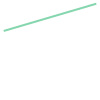

In [59]:
coordinates_25_to_19 = [(-122.23124, 37.76876), (-122.23141, 37.76871)]
LineString(coordinates_25_to_19)  # edge 5909483625 -> 5909483619


In [60]:
coordinates_19_to_36 = [
        (-122.2314069, 37.7687054),
        (-122.2314797, 37.7687656),
        (-122.2315618, 37.7688239),
        (-122.2316698, 37.7688952),
        (-122.2317839, 37.7689584),
    ]

In [ ]:

LineString(coordinates_25_to_19),  # edge 5909483625 -> 5909483619
LineString(coordinates_25_to_19[::-1])  # edge 5909483619 -> 5909483625
LineString(coordinates_19_to_36)  # edge 5909483619 -> 5909483636
LineString(coordinates_19_to_36[::-1])  # edge 5909483636 -> 5909483619

# create a geodataframe with the linestrings defined here



In [62]:
expected_edges_gdf_data = [
        LineString(coordinates_25_to_19),  # edge 5909483625 -> 5909483619
        LineString(coordinates_25_to_19[::-1]),  # edge 5909483619 -> 5909483625
        LineString(coordinates_19_to_36),  # edge 5909483619 -> 5909483636
        LineString(coordinates_19_to_36[::-1]),  # edge 5909483636 -> 5909483619
    ]


In [63]:
expected_edges_gdf_data

In [66]:
gpd.GeoSeries(expected_edges_gdf_data)

0                                                                   LINESTRING (-122.23124 37.76876, -122.23141 37.76871)
1                                                                   LINESTRING (-122.23141 37.76871, -122.23124 37.76876)
2    LINESTRING (-122.23141 37.76871, -122.23148 37.76877, -122.23156 37.76882, -122.23167 37.76890, -122.23178 37.76896)
3    LINESTRING (-122.23178 37.76896, -122.23167 37.76890, -122.23156 37.76882, -122.23148 37.76877, -122.23141 37.76871)
dtype: geometry